In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torch import nn
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.linalg import expm

import utils

In [202]:
np.random.seed(1444)
# n = 12
n = 4
Toeplitz = lambda n: 3 * np.eye(n) - np.tri(n, k=1) + np.tri(n, k=-2)
S = Toeplitz(n) 
Sprime = np.random.randn(n, n) * 10
print(S)
print(Sprime)
# S += 0.01 * np.eye(n)
print(np.linalg.cond(S))
print(np.linalg.cond(Sprime))

# S -= 0.001
# S[n-1, 0] = 1
# S[0, n-1] = 1
# print(np.linalg.cond(S))
evals, evecs = utils.eigsort(S)
pvals, pvecs = utils.eigsort(Sprime)

print(evals)
print(pvals)

print(evecs - pvecs)



[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]
[[  7.99765329  -5.93028619  28.50892112  -3.5337648 ]
 [ -0.77764532   5.89136455  -7.08110784   1.07790755]
 [  1.31238966  -4.57136358 -14.06219563   1.04416997]
 [  1.46366453  -0.28914403  16.71618744  -4.61121356]]
9.472135954999587
16.433982868668213
[0.38196601 1.38196601 2.61803399 3.61803399]
[-18.14754052  -2.75421837   4.62281504  11.4945525 ]
[[-0.98188972 -0.57946476 -1.52507794 -1.32474015]
 [-0.44184323 -0.40528768  0.00169699  0.81784644]
 [-0.07996738  0.47959016  0.39192002 -0.69687863]
 [-0.94641251  1.59485868 -0.69979068  0.18226516]]


  0%|          | 0/1000 [00:00<?, ?it/s]

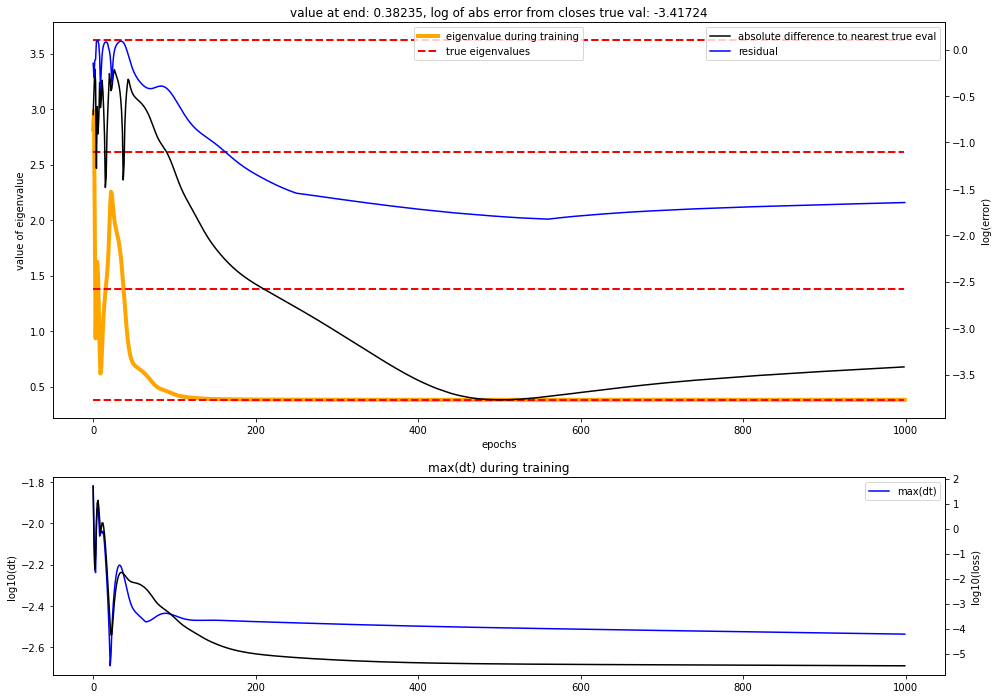

In [208]:
model = utils.EigenSolver(n, [10, 20, 24], nonlin=nn.ReLU, use_bias=False, seed=1444)
model.train(S, t=[1e2], epochs=1000, lr=0.0035)
# model = utils.EigenSolver(n, [10, 20, 25], nonlin=nn.ReLU, use_bias=False, seed=1444)
# model.train(S, t=[10, 100], epochs=300, lr=0.003)
utils.plot_history(model, evals, evecs);

  0%|          | 0/1000 [00:00<?, ?it/s]

Vector stopped moving!


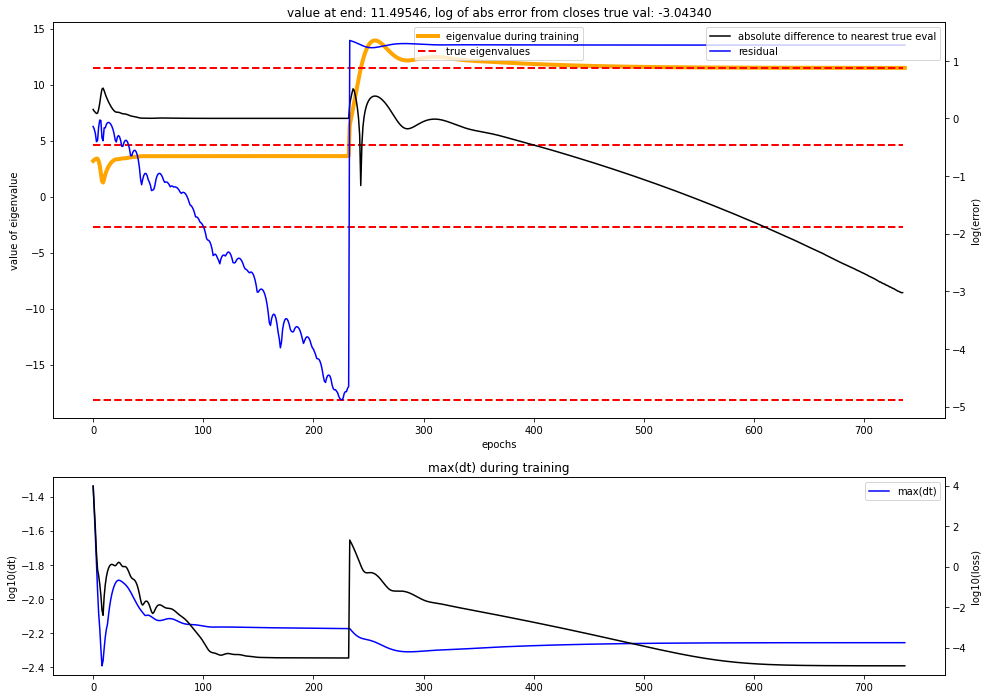

In [197]:
model.train(Sprime, [1e2], epochs=1000, lr=0.0001)
utils.plot_history(model, pvals, pvecs);

  0%|          | 0/1000 [00:00<?, ?it/s]

Vector stopped moving!


/home/hakon/.pyenv/versions/3.9.2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


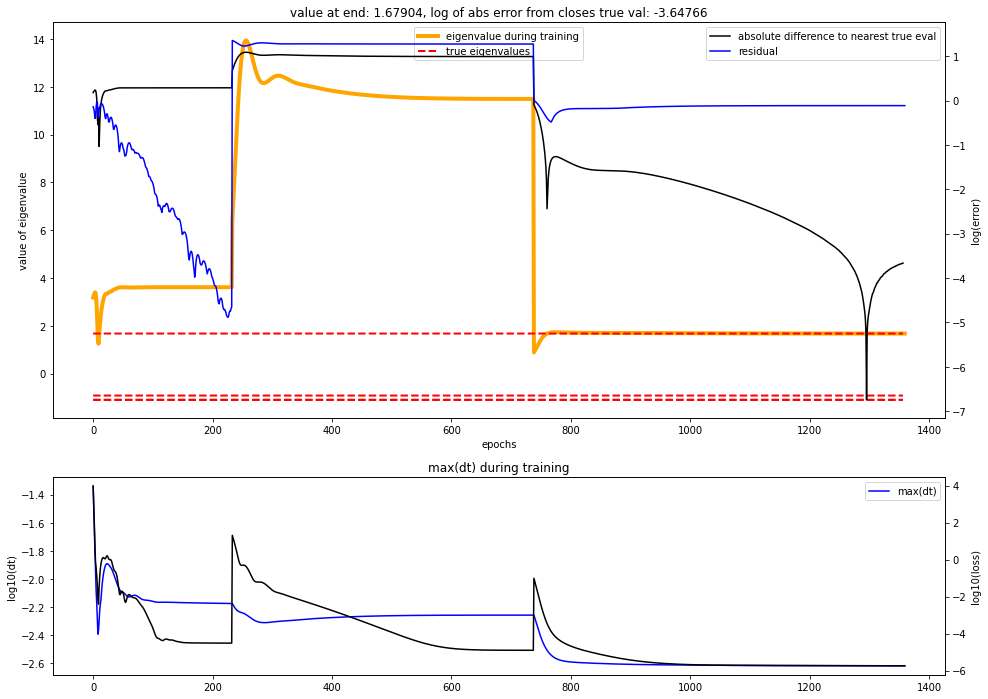

In [198]:
P = np.random.randn(n, n)
model.train(P, [1e2], 1000, lr=0.0001)
utils.plot_history(model, *np.linalg.eig(P))

In [201]:
print(np.linalg.eig(P))

(array([ 1.67926185+0.j        , -1.09608076+1.85460556j,
       -1.09608076-1.85460556j, -0.91595392+0.j        ]), array([[ 0.28293264+0.j        , -0.06894917+0.57899409j,
        -0.06894917-0.57899409j, -0.1242781 +0.j        ],
       [-0.79565256+0.j        ,  0.20227316+0.24339778j,
         0.20227316-0.24339778j, -0.15720289+0.j        ],
       [ 0.25108727+0.j        , -0.15270958-0.26294534j,
        -0.15270958+0.26294534j, -0.85131455+0.j        ],
       [-0.47311871+0.j        , -0.68366255+0.j        ,
        -0.68366255-0.j        ,  0.48487704+0.j        ]]))


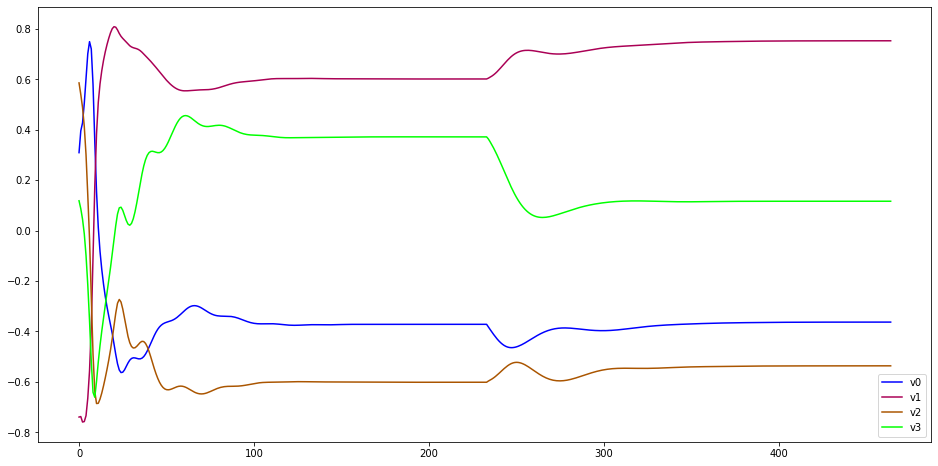

In [194]:
fig, axs = plt.subplots(figsize=(16, 8))
cols = mpl.cm.brg(np.linspace(0, 1, n))
mvecs = np.column_stack(model.vecs)
for c in range(n):
    axs.plot(mvecs[c, :], color=cols[c])
    axs.legend([f"v{i}" for i in range(n)])



In [78]:
print(model.evec)
print(model.eval)
print(evals)

[ 0.44674584 -0.44817263  0.44684225  0.44694015  0.4473656 ]
2.0016487391023823
[3.73205081 3.         2.         0.26794919 1.        ]
